#                        Bank Personal Loan Modelling

### Load libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

### Read Data & Analyze

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.shape

(5000, 14)

In [5]:
#Let's drop ID colummn
df.drop('ID',axis=1,inplace=True)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


### EDA

In [7]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.isnull().values.any()

False

In [9]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [10]:
zereoMortgageCount = df['Mortgage'][df['Mortgage'] == 0].count()
print("Number of people with zero mortgage : ",zereoMortgageCount)

Number of people with zero mortgage :  3462


In [11]:
zeroSpending = df["CCAvg"][df['CCAvg'] == 0].count()
print("No. Of people with zero CC spending/m",zeroSpending)

No. Of people with zero CC spending/m 106


In [12]:
#Let's convert Education numerical value to String representation
df["Education"].replace({1:'Undergrad',2:'Graudate',3:'Professioanl'},inplace=True)
print(df['Education'])

0          Undergrad
1          Undergrad
2          Undergrad
3           Graudate
4           Graudate
            ...     
4995    Professioanl
4996       Undergrad
4997    Professioanl
4998        Graudate
4999       Undergrad
Name: Education, Length: 5000, dtype: object


In [13]:
# Categorical Variables : Education, Personal Loan, Securities Account, CD Account, Online, Credit card
catCols = list(['Education','Personal Loan','Securities Account','CD Account','Online','CreditCard'])
for index in catCols:
    print(df[index].value_counts(),"\n")

Undergrad       2096
Professioanl    1501
Graudate        1403
Name: Education, dtype: int64 

0    4520
1     480
Name: Personal Loan, dtype: int64 

0    4478
1     522
Name: Securities Account, dtype: int64 

0    4698
1     302
Name: CD Account, dtype: int64 

1    2984
0    2016
Name: Online, dtype: int64 

0    3530
1    1470
Name: CreditCard, dtype: int64 



### Univariate Analysis

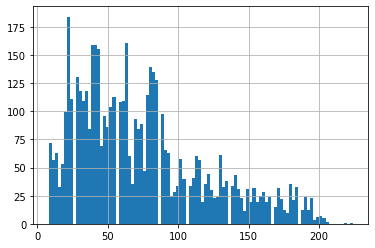

In [14]:
# Let's look at the Income
df['Income'].hist(bins=100)

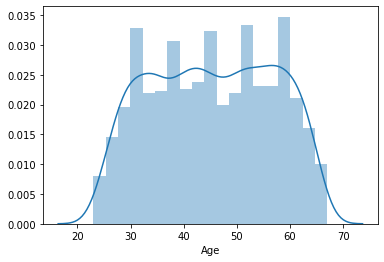

In [15]:
#Let's look at the age
sns.distplot(df['Age'])
plt.show()

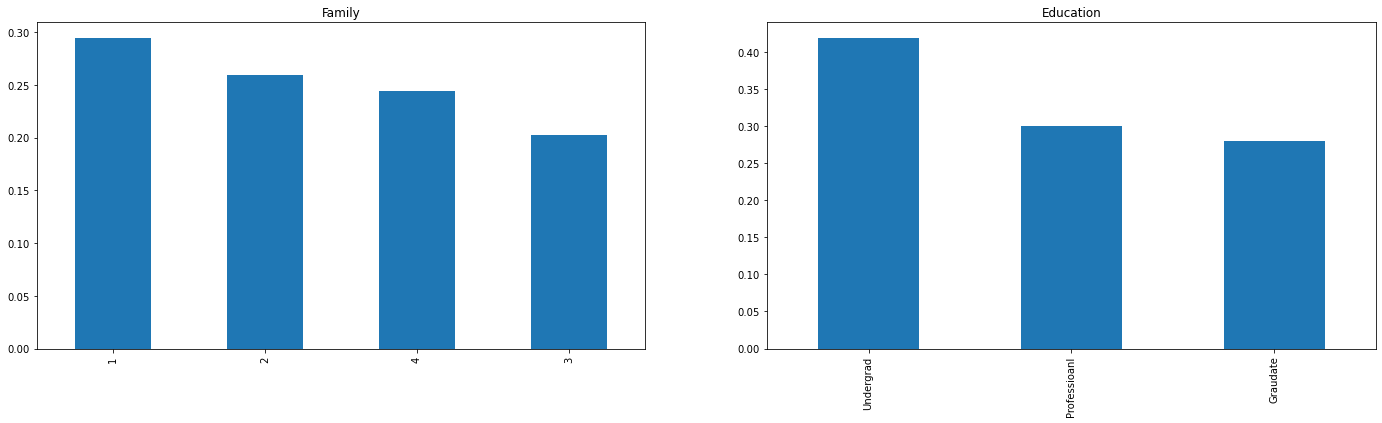

In [16]:
#Let's look at the Education and Family Size
plt.figure(1)
plt.subplot(121)
df['Family'].value_counts(normalize=True).plot.bar(figsize=(24,6), title = 'Family')
plt.subplot(122)
df['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6), title = 'Education')

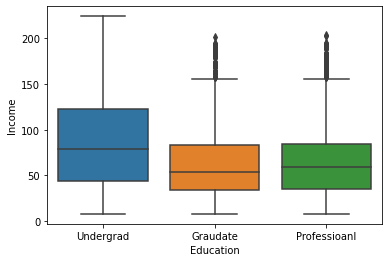

In [17]:
#Let's look at the Education and Income
sns.boxplot( x='Education', y='Income', data = df)

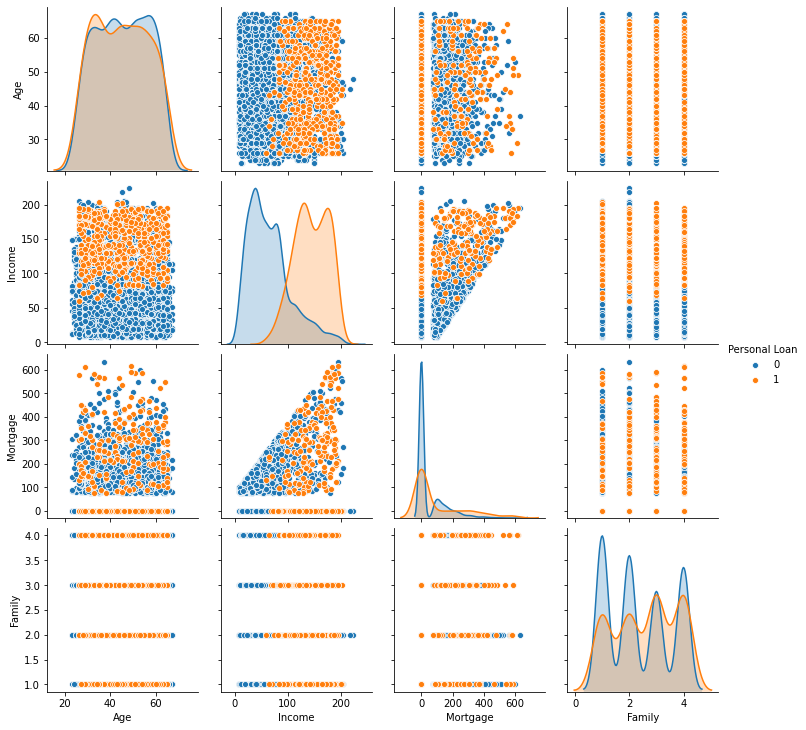

In [18]:
#Let's look at pair plot for few key columns
sns.pairplot(df[["Age","Income","Mortgage","Family","Personal Loan"]],hue="Personal Loan")

### Bivariate Analysis

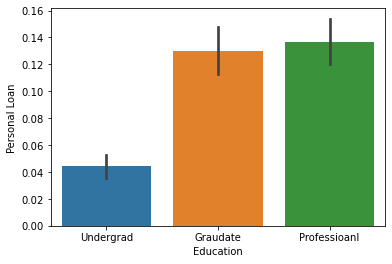

In [19]:
#Education Vs Personal Loan
sns.barplot(x= 'Education', y = 'Personal Loan', data = df)

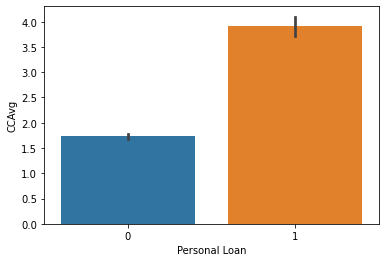

In [20]:
#CCAvg Vs Personal Loan
sns.barplot(x= 'Personal Loan', y = 'CCAvg', data = df)
plt.show()

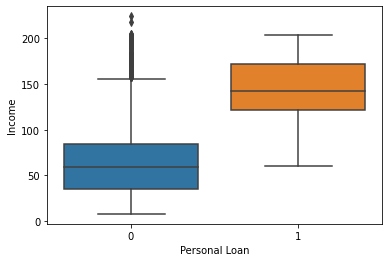

In [21]:
#Income Vs Personal Loan
sns.boxplot(y= 'Income', x = 'Personal Loan', data = df)

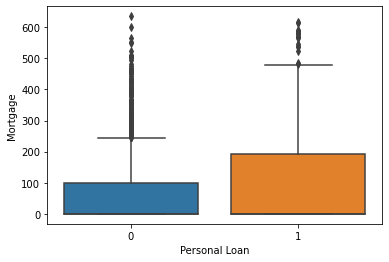

In [22]:
#Mortgage Vs Personal Loan
sns.boxplot(y= 'Mortgage', x = 'Personal Loan', data = df)

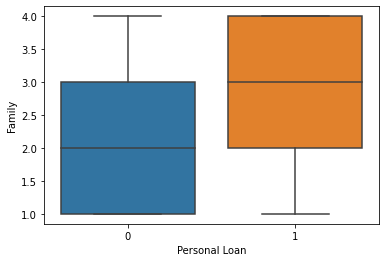

In [23]:
sns.boxplot(y= 'Family', x = 'Personal Loan', data = df)

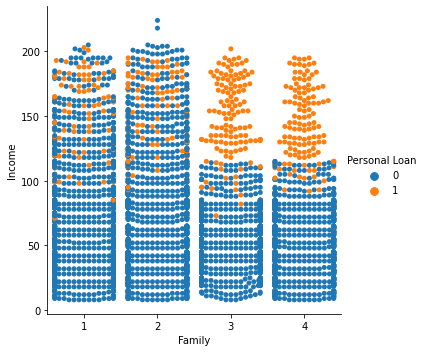

In [24]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = df, kind='swarm')

In [25]:
#Let's look at the personal loan against Family Securities Account CD Account Online CreditCard

def get_ct(df,var, var2):
    ct_res = pd.crosstab(df[var], df[var2], margins = True)
    return ct_res.drop(columns = 'All')

get_ct(df, 'Family', 'Personal Loan')

Personal Loan,0,1
Family,,
1,1365,107
2,1190,106
3,877,133
4,1088,134
All,4520,480


In [26]:
get_ct(df, 'CD Account', 'Personal Loan')

Personal Loan,0,1
CD Account,,
0,4358,340
1,162,140
All,4520,480


In [27]:
get_ct(df, 'Online', 'Personal Loan')

Personal Loan,0,1
Online,,
0,1827,189
1,2693,291
All,4520,480


In [28]:
get_ct(df, 'CreditCard', 'Personal Loan')

Personal Loan,0,1
CreditCard,,
0,3193,337
1,1327,143
All,4520,480


In [29]:
get_ct(df, 'Securities Account', 'Personal Loan')

Personal Loan,0,1
Securities Account,,
0,4058,420
1,462,60
All,4520,480


### Model Building

In [30]:
convertedDF = df.copy()
for col  in catCols:
    convertedDF[col] = convertedDF[col].astype('category')
convertedDF.info()

X = convertedDF.drop('Personal Loan', axis=1)
Y = convertedDF['Personal Loan']

X = pd.get_dummies(X,drop_first=True)
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   category
 9   Securities Account  5000 non-null   category
 10  CD Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(6)
memory usage: 303.4 KB


,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Education_Professioanl,Education_Undergrad,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,91107,4,1.6,0,0,1,1,0,0,0
1,45,19,34,90089,3,1.5,0,0,1,1,0,0,0
2,39,15,11,94720,1,1.0,0,0,1,0,0,0,0
3,35,9,100,94112,1,2.7,0,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,0,0,0,0,0,0,1


### Split Training  & Testing Data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 717 to 4271
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3500 non-null   int64  
 1   Experience              3500 non-null   int64  
 2   Income                  3500 non-null   int64  
 3   ZIP Code                3500 non-null   int64  
 4   Family                  3500 non-null   int64  
 5   CCAvg                   3500 non-null   float64
 6   Mortgage                3500 non-null   int64  
 7   Education_Professioanl  3500 non-null   uint8  
 8   Education_Undergrad     3500 non-null   uint8  
 9   Securities Account_1    3500 non-null   uint8  
 10  CD Account_1            3500 non-null   uint8  
 11  Online_1                3500 non-null   uint8  
 12  CreditCard_1            3500 non-null   uint8  
dtypes: float64(1), int64(6), uint8(6)
memory usage: 239.3 KB


### Run Logistic Regression

In [32]:
logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train) 

LogisticRegression(random_state=7)

In [33]:
pred_train = logreg.predict(X_train)
mat_train = confusion_matrix(y_train, pred_train)
print("confusion matrix  = \n", mat_train)

confusion matrix  = 
 [[3060   98]
 [ 237  105]]


In [34]:
y_predict = logreg.predict(X_test)
mat_test = confusion_matrix(y_test, y_predict)
print("confusion matrix  = \n", mat_test)

confusion matrix  = 
 [[1334   28]
 [  99   39]]


In [35]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training Accuracy :  0.9042857142857142

Testing Accuracy :  0.9153333333333333

Confusion Matrix : 


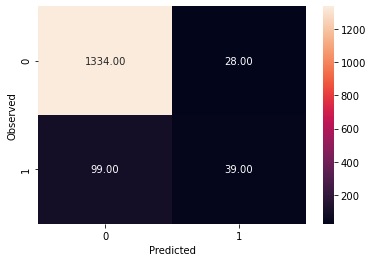

None

Recall :  0.2826086956521739

Precision :  0.582089552238806

F1 Score :  0.38048780487804873

Roc Auc Score :  0.6310253463576582


In [36]:
print("Training Accuracy : ",logreg.score(X_train,y_train))  
print()
print("Testing Accuracy : ",logreg.score(X_test, y_test))
print()
print("Confusion Matrix : ")
print(draw_cm(y_test,y_predict))
print()
print("Recall : ",recall_score(y_test,y_predict))
print()
print("Precision : ",precision_score(y_test,y_predict))
print()
print("F1 Score : ",f1_score(y_test,y_predict))
print()
print("Roc Auc Score : ",roc_auc_score(y_test,y_predict))

In [37]:
coeffDF = pd.DataFrame()
coeffDF['Column'] = X_train.columns
coeffDF['Coeff'] = np.round(abs(logreg.coef_[0]),2)
coeffDF.sort_values(by='Coeff',ascending=False)

,Column,Coeff
2,Income,0.03
0,Age,0.00
1,Experience,0.00
3,ZIP Code,0.00
4,Family,0.00
5,CCAvg,0.00
6,Mortgage,0.00
7,Education_Professioanl,0.00
8,Education_Undergrad,0.00
9,Securities Account_1,0.00


In [38]:
z = X_test.copy()
z['Observed PL'] = y_test
z['Predicted PL'] = y_predict
z[z['Predicted PL'] != z['Observed PL']]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Education_Professioanl,Education_Undergrad,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed PL,Predicted PL
4301,49,24,130,92677,4,1.1,281,0,1,0,1,1,0,1,0
4575,53,27,115,90095,2,0.5,0,1,0,0,0,0,0,1,0
2061,63,38,159,93950,4,4.9,111,0,0,0,0,0,0,1,0
2261,30,3,150,94305,4,5.0,0,0,0,0,0,1,0,1,0
78,54,30,133,93305,2,2.6,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,34,9,123,94553,1,1.6,0,0,0,0,0,1,0,1,0
1499,52,26,91,92173,1,4.3,0,0,0,0,1,1,1,1,0
927,65,40,95,95014,3,3.7,138,0,0,0,0,0,1,1,0
3084,26,0,129,90028,3,0.7,0,0,0,0,0,0,0,1,0


### Business Insights

1. People with higher Income took/likely to take personal loans
2. Most of the people with CD Account took/likely to take personal loan
3. Family size 3+ with higher income took/likely to take personal loan
4. People with high Credit card spending per month took/likely to take personal loan